Exercise 6 - Support Vector Machines
=====

Support vector machines (SVMs) let us predict categories. This exercise will demonstrate a simple support vector machine that can predict a category from a small number of features. 

Our problem is that we want to be able to categorise which type of tree an new specimen belongs to. To do this, we will use features of three different types of trees to train an SVM. 

In [1]:
# Run this code!
# It sets up the graphing configuration.
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

Step 1
-----

First, we will take a look at the raw data first to see what features we have.

In [2]:
import pandas as pd
import numpy as np

# Loads the SVM library
from sklearn import svm

# Loads the dataset
data = pd.read_csv('Data/trees.csv')

###--- WRITE print(data.head()) TO VIEW THE TOP 5 DATA POINTS OF THE DATA SET ---###
print(data.head())
###

   leaf_width  leaf_length  trunk_girth  trunk_height  tree_type
0        5.13         6.18         8.26          8.74          0
1        7.49         4.02         8.07          6.78          0
2        9.22         4.16         5.46          8.45          1
3        6.98        11.10         6.96          4.06          2
4        3.46         5.19         8.72         10.40          0


It looks like we have _four features_ (leaf_width, leaf_length, trunk_girth, trunk_height) and _one label_ (tree_type).

Let's plot it. 

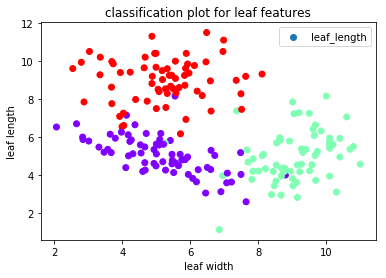

In [3]:
# Run this code to plot the leaf features

# This extracts the features. drop() deletes the column we state (tree_type), leaving on the features
features = data.drop(['tree_type'], axis = 1)

# This keeps only the column we state (tree_type), leaving only our label
labels = np.array(data['tree_type'])

#Plots the graph
x=features['leaf_width']
y=features['leaf_length']
color=labels
graph.scatter(x, y, c = color)
graph.title('classification plot for leaf features')
graph.xlabel('leaf width')
graph.ylabel('leaf length')
graph.legend()
graph.show()

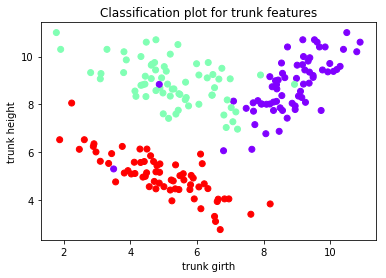

In [4]:
# Run this code to plot the trunk features
graph.scatter(features['trunk_girth'], features['trunk_height'], c = labels)
graph.title('Classification plot for trunk features')
graph.xlabel('trunk girth')
graph.ylabel('trunk height')
graph.show()

Step 2
-----

Lets make a support vector machine.

The syntax for a support vector machine is as follows:

__`model = svm.SVC().fit(features, labels)`__

Your features set will be called __`X`__ and your labels set will be called __`Y`__

Let's first run the SVM using the first two features, the leaf features.

In [5]:
# Sets up the feature and target sets for leaf features

# Feature 1
X1 = features['leaf_width'].values

# Feature 2
X2 = features['leaf_length'].values

# Feature matrix
X = np.asarray([X1, X2]).transpose()

# Target label
Y = labels 

# Fits the SVM model
###--- REPLACE THE ???'S WITH THE CODE TO MAKE A SVM MODEL AS ABOVE ---###
model = svm.SVC().fit(features, labels)
###
print("Model ready. Now plot it to see the result.")

Model ready. Now plot it to see the result.


In [6]:
# Run this to plots the SVM model
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
Y_min, Y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(X_min, X_max, .02), np.arange(Y_min, Y_max, .02))
Z = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

graph.scatter(X1, X2, c = Y, cmap = graph.cm.rainbow, zorder = 10, edgecolor = 'k', s = 40)
graph.contourf(XX, YY, Z, cmap = graph.cm.rainbow, alpha = 1.0)
graph.contour(XX, YY, Z, colors = 'k', linestyles = '--', alpha=0.5)

graph.title('SVM plot for leaf features')
graph.xlabel('leaf width')
graph.ylabel('leaf length')

graph.show()

ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

The graph shows three colored zones that the SVM has chosen to group the datapoints in. Color, here, means type of tree. As we can see, the zones correspond reasonably well with the actual tree types of our training data. This means that the SVM can group, for its training data, quite well calculate tree type based on leaf features.


Now let's do the same using trunk features.

In [ ]:
# Feature 1
###--- REPLACE THE ???s BELOW WITH 'trunk_girth' (INCLUDING THE QUOTES) ---###
X1 = features[???].values
###

# Feature 2
###--- REPLACE THE ???s BELOW WITH 'trunk_height' (INCLUDING THE QUOTES) ---###
X2 = features[???].values
###

# Feature set
X = np.asarray([X1, X2]).transpose()

# Target label
Y = labels 

# Fits the SVM model
model = svm.SVC().fit(X, Y)

# Plots the SVM model
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
Y_min, Y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(X_min, X_max, .02), np.arange(Y_min, Y_max, .02))
Z = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

graph.scatter(X1, X2, c = Y, cmap = graph.cm.rainbow, zorder = 10, edgecolor = 'k', s = 40)
graph.contourf(XX, YY, Z, cmap = graph.cm.rainbow, alpha = 1.0)
graph.contour(XX, YY, Z, colors = 'k', linestyles = '--', alpha = 0.5)

graph.title('SVM plot for leaf features')
graph.xlabel('trunk girth')
graph.ylabel('trunk height')

graph.show()

Conclusion
-------

And that's it! You've made a simple support vector machine that can predict the type of tree based on the leaf and trunk measurements!

You can go back to the course now and click __'Next Step'__ to move onto how we can test AI models.